# Análisis exploratorio de datos (EDA) del set de datos Mariscos Guasave
El EDA es una herramienta de análisis para una revisión iterativa de las bases de datos con la cual describimos las principales características usando estadística descriptiva y visualización de datos.

## Contenido
1. Fuentes de datos
2. Descripción de los datos
3. Limpieza de datos
4. Missing values
5. Visualización de datos
6. EDA un proceso iterativo
7. Referencias

## 1. Fuentes de datos

El set de datos de Mariscos Guasave es un set de datos que se obtuvo mediante la recolecion de la informacion del consumo de alimentos y bebidas en el establecimiento. El set de datos cuenta con 216 observaciones de la interacion de clientes con 114 opciones con las que cuenta el menu. La informacion dentro del set de datos es informacion privada que el negocio nos ha permitido utilizar para su analisis.  





In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt

In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--Instalar desde `pip`
# !conda install -c conda-forge altair vega_datasets #<--Instalar desde `conda`

import altair as alt
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [36]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load dataset
file = "MG_22101601.csv"
df = pd.read_csv(file)
df

,ID,Sexo,Edad,Fecha,Dia,Hora,C001-089,C001-087,C001-090,C001-092,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
0,1,F,35,9/1/22,Thursday,14:35,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,30,9/1/22,Thursday,14:43,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,9/1/22,Thursday,15:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,F,32,9/1/22,Thursday,15:44,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,37,9/1/22,Thursday,15:50,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,M,40,10/11/22,Tuesday,16:27,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,442,F,40,10/11/22,Tuesday,13:51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,443,F,58,10/11/22,Tuesday,13:47,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,444,F,30,10/11/22,Tuesday,15:51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
file = "Diccionario_MG.csv"
dic_df = pd.read_csv(file)
dic_df

,Producto,Platillo,Precio
0,C001-001,PULPO (GRANDE),210
1,C001-002,PULPO (CHICO),190
2,C001-003,CAMARON COCIDO (GRANDE),180
3,C001-004,CAMARON COCIDO (CHICO),155
4,C001-005,AGUACHILE (GRANDE) ROJO O NEGRO,165
...,...,...,...
110,C001-111,FLAN,35
111,C001-112,Agua Natural,20
112,C001-113,1/2 Callo de Hacha,100
113,C001-114,CLAMATO Clamato Preparado,55


## 2. Descripción de los datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 120 entries, ID to C001-115
dtypes: float64(114), int64(2), object(4)
memory usage: 417.3+ KB


In [68]:
df.head()

,ID,Sexo,Edad,Fecha,Dia,Hora,C001-089,C001-087,C001-090,C001-092,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
0,1,F,35,2022-09-01,Thursday,14:35,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,30,2022-09-01,Thursday,14:43,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,2022-09-01,Thursday,15:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,F,32,2022-09-01,Thursday,15:44,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,37,2022-09-01,Thursday,15:50,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,ID,Edad,C001-089,C001-087,C001-090,C001-092,C001-094,C001-088,C001-112,C001-095,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
count,445.000000,445.000000,144.000000,118.00000,82.000000,90.000000,49.000000,34.000000,4.00,23.000000,...,0.0,1.0,8.00000,9.000000,30.000000,7.000000,17.000000,2.0,3.0,1.0
mean,223.000000,41.923596,1.465278,1.59322,2.036585,1.933333,1.775510,1.323529,1.75,2.043478,...,NaN,1.0,1.50000,1.333333,1.066667,1.285714,1.117647,1.0,1.0,1.0
std,128.604691,9.150568,0.783690,0.77611,1.673653,1.883100,1.212183,0.588814,1.50,1.664557,...,NaN,NaN,0.92582,0.707107,0.253708,0.487950,0.332106,0.0,0.0,NaN
min,1.000000,22.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,...,NaN,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
25%,112.000000,35.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,...,NaN,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
50%,223.000000,40.000000,1.000000,1.00000,1.500000,1.000000,1.000000,1.000000,1.00,1.000000,...,NaN,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
75%,334.000000,48.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.750000,1.75,2.000000,...,NaN,1.0,1.50000,1.000000,1.000000,1.500000,1.000000,1.0,1.0,1.0
max,445.000000,85.000000,5.000000,4.00000,12.000000,13.000000,5.000000,3.000000,4.00,8.000000,...,NaN,1.0,3.00000,3.000000,2.000000,2.000000,2.000000,1.0,1.0,1.0


In [8]:
# Número de términos únicos por variable
df.nunique()

ID          445
Sexo          3
Edad         41
Fecha        26
Dia           7
           ... 
C001-099      2
C001-100      2
C001-101      1
C001-110      1
C001-115      1
Length: 120, dtype: int64

### Información general de la base de datos

In [9]:
# fechas
print("- El rango de fechas va desde {0} hasta {1}.".format(df.Fecha.unique().min(), df.Fecha.unique().max()))

- El rango de fechas va desde 10/1/22 hasta 9/9/22.


In [10]:
dias = df.Dia.unique()
print(dias)

['Thursday' 'Friday' 'Tuesday' 'Saturday' 'Wednesday' 'Monday' 'Sunday']


In [11]:
# Dias de las observaciones

for i in df.Dia.unique():
    print("    * "+i)

    * Thursday
    * Friday
    * Tuesday
    * Saturday
    * Wednesday
    * Monday
    * Sunday


In [12]:
# Cantidad de observacioes por dia
m=0
t=0
w=0
th=0
f=0
sa=0
so=0


for i in df.Dia:
    if i == "Monday":
        m = m + 1
    if i == "Tuesday":
        t = t + 1
    if i == "Wednesday":
        w = w + 1
    if i == "Thursday":
        th = th + 1
    if i == "Friday":
        f = f + 1
    if i == "Saturday":
        sa = sa + 1
    if i == "Sunday":
        so = so + 1
        
print("Monday =",m)
print("Tuesday =",t)
print("Wednesday =",w)
print("Thursday =",th)
print("Friday =",f)
print("Saturday =",sa)
print("Sunday =",so)

Monday = 42
Tuesday = 57
Wednesday = 41
Thursday = 60
Friday = 108
Saturday = 102
Sunday = 35


In [13]:
#valores nullos por columna
df.isnull().sum()

ID            0
Sexo          0
Edad          0
Fecha         0
Dia           0
           ... 
C001-099    438
C001-100    428
C001-101    443
C001-110    442
C001-115    444
Length: 120, dtype: int64

In [15]:
df.dtypes

ID            int64
Sexo         object
Edad          int64
Fecha        object
Dia          object
             ...   
C001-099    float64
C001-100    float64
C001-101    float64
C001-110    float64
C001-115    float64
Length: 120, dtype: object

In [16]:
try:
    df = df.astype({'Fecha':'datetime64[ns]'})
except:
    next
    
df.dtypes

ID                   int64
Sexo                object
Edad                 int64
Fecha       datetime64[ns]
Dia                 object
                 ...      
C001-099           float64
C001-100           float64
C001-101           float64
C001-110           float64
C001-115           float64
Length: 120, dtype: object

In [17]:
# date
try:
    df.Fecha = [datetime.strptime(i, '%Y-%m-%d') for i in df.Fecha]
except:
    next

In [18]:
df.head()

,ID,Sexo,Edad,Fecha,Dia,Hora,C001-089,C001-087,C001-090,C001-092,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
0,1,F,35,2022-09-01,Thursday,14:35,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,30,2022-09-01,Thursday,14:43,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,2022-09-01,Thursday,15:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,F,32,2022-09-01,Thursday,15:44,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,37,2022-09-01,Thursday,15:50,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 120 entries, ID to C001-115
dtypes: datetime64[ns](1), float64(114), int64(2), object(3)
memory usage: 417.3+ KB


In [20]:
df.isna()

,ID,Sexo,Edad,Fecha,Dia,Hora,C001-089,C001-087,C001-090,C001-092,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,False,False,False,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
441,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
442,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
443,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


## 3. Missing values

In [21]:
#Agregamos el valor 0 a los elementos 'NaN'
df_clean =df.fillna(0)
df_clean

,ID,Sexo,Edad,Fecha,Dia,Hora,C001-089,C001-087,C001-090,C001-092,...,C001-074,C001-086,C001-096,C001-097,C001-098,C001-099,C001-100,C001-101,C001-110,C001-115
0,1,F,35,2022-09-01,Thursday,14:35,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,M,30,2022-09-01,Thursday,14:43,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,M,36,2022-09-01,Thursday,15:00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,F,32,2022-09-01,Thursday,15:44,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,F,37,2022-09-01,Thursday,15:50,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,M,40,2022-10-11,Tuesday,16:27,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441,442,F,40,2022-10-11,Tuesday,13:51,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442,443,F,58,2022-10-11,Tuesday,13:47,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
443,444,F,30,2022-10-11,Tuesday,15:51,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
#Creamos una nueva dataframe donde se encontrara la suma de cada opcion del menu pedida 
s= pd.DataFrame(df_clean.sum()).reset_index().rename(columns={"index":"Producto", 0:"Suma"})
s

,Producto,Suma
0,ID,99235
1,Sexo,FMMFFMMFFMFMFFMMFMMFMMMMMMMFMMMMMMMMMMMMMMMMMM...
2,Edad,18656
3,Dia,ThursdayThursdayThursdayThursdayThursdayThursd...
4,Hora,14:3514:4315:0015:4415:5016:0016:3016:3517:201...
...,...,...
114,C001-099,9
115,C001-100,19
116,C001-101,2
117,C001-110,3


## 4. Limpieza de datos

In [82]:
#Removemos las filas que no corresponden a los productos
s = s.drop([0,1,2,3,4])

In [83]:
s = s.sort_values(by='Suma',ascending= False)

## 5. Visualización de datos

In [84]:
#Ordenamos la lista par aobserver que productos osn los mas solicitados 
s.head(10)

,Producto,Suma
5,C001-089,211
6,C001-087,188
8,C001-092,174
7,C001-090,167
24,C001-035,146
25,C001-036,145
9,C001-094,87
22,C001-025,82
18,C001-053,80
27,C001-028,74


In [85]:
#Observamos de mayor a menor que producto genera mas ingresos. 
alt.Chart(prod).mark_bar().encode(
    alt.X('Producto',  sort='-y'),
    alt.Y('Suma', title="Frecuencia"),
    alt.Color('Producto', legend=None),
    tooltip=['Producto', 'Suma']
).properties(title="Frecuencia de los productos")

alt.Chart(...)

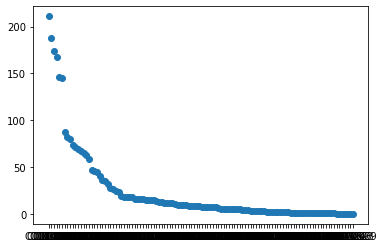

In [86]:
#Observamos el compartamieto de los productos 
plt.scatter(s.Producto,s.Suma)


In [87]:
#En una nueva dataframe podemos observar los valores de los codidos del producto
dic_df

,Producto,Platillo,Precio
0,C001-001,PULPO (GRANDE),210
1,C001-002,PULPO (CHICO),190
2,C001-003,CAMARON COCIDO (GRANDE),180
3,C001-004,CAMARON COCIDO (CHICO),155
4,C001-005,AGUACHILE (GRANDE) ROJO O NEGRO,165
...,...,...,...
110,C001-111,FLAN,35
111,C001-112,Agua Natural,20
112,C001-113,1/2 Callo de Hacha,100
113,C001-114,CLAMATO Clamato Preparado,55


In [88]:
#Agregamos los valores de los codigos de los productos a la nueva dataframe
prod = pd.merge(s,dic_df,on=['Producto'],how = 'inner')
prod.head(10)

,Producto,Suma,Platillo,Precio
0,C001-089,211,REFRESCO,30
1,C001-087,188,AGUAS FRESCAS,30
2,C001-092,174,PACIFICO,35
3,C001-090,167,CORONA,35
4,C001-035,146,ATUN,70
5,C001-036,145,ATUN C/MANGO,80
6,C001-094,87,MODELO,40
7,C001-025,82,CEVICHE DE CAMARON,45
8,C001-053,80,CHICHARRONES DE BOTETE,175
9,C001-028,74,DE AGUACHILE,70


In [89]:
#Agregamos el valor de los ingresos generados por cada uno de los productos
prod['Total']= prod.Suma*prod.Precio
prod.head(20)

,Producto,Suma,Platillo,Precio,Total
0,C001-089,211,REFRESCO,30,6330
1,C001-087,188,AGUAS FRESCAS,30,5640
2,C001-092,174,PACIFICO,35,6090
3,C001-090,167,CORONA,35,5845
4,C001-035,146,ATUN,70,10220
5,C001-036,145,ATUN C/MANGO,80,11600
6,C001-094,87,MODELO,40,3480
7,C001-025,82,CEVICHE DE CAMARON,45,3690
8,C001-053,80,CHICHARRONES DE BOTETE,175,14000
9,C001-028,74,DE AGUACHILE,70,5180


(array([60., 20.,  6.,  9.,  4.,  4.,  5.,  1.,  0.,  1.,  1.,  1.,  1.,
         0.,  1.]),
 array([0.0, 933.3333333333334, 1866.6666666666667, 2800.0,
        3733.3333333333335, 4666.666666666667, 5600.0, 6533.333333333334,
        7466.666666666667, 8400.0, 9333.333333333334, 10266.666666666668,
        11200.0, 12133.333333333334, 13066.666666666668, 14000.0],
       dtype=object),
 <BarContainer object of 15 artists>)

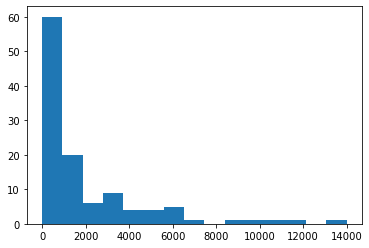

In [90]:
#En el siguiente histograma podemos observar los diferentes ingresos que generan los diferentes productos
plt.hist(prod.Total,bins=15)


In [94]:
#Ordenamos  el datframe para  poder observar de de mayor a menor que producto genera mas ingresos. 
prod = prod.sort_values(by='Total',ascending= False)
prod.head(20)

,Producto,Suma,Platillo,Precio,Total
8,C001-053,80,CHICHARRONES DE BOTETE,175,14000
5,C001-036,145,ATUN C/MANGO,80,11600
14,C001-046,63,CHABELA,165,10395
4,C001-035,146,ATUN,70,10220
15,C001-029,59,ESPECIAL,145,8555
19,C001-005,40,AGUACHILE (GRANDE) ROJO O NEGRO,165,6600
25,C001-019,24,GUASAVENA PERSONAL,265,6360
0,C001-089,211,REFRESCO,30,6330
2,C001-092,174,PACIFICO,35,6090
3,C001-090,167,CORONA,35,5845


In [95]:
#Observamos de de mayor a menor que producto genera mas ingresos. 
alt.Chart(prod).mark_bar().encode(
    alt.X('Producto',  sort='-y'),
    alt.Y('Total', title="Total"),
    alt.Color('Producto', legend=None),
    tooltip=['Producto', 'Total']
).properties(title="Ingreso Generado por producto")

alt.Chart(...)